In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

warnings.filterwarnings("ignore")

## Discover the data


In [2]:
# TODO:1- match the description with our table data
coffee = pd.read_csv("dataset/coffee.csv")

coffee.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


# EDA: 
## checking the types

In [3]:
coffee.dtypes

Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option      object
Takeout option      object
dtype: object

## Checking the null values


In [4]:
# TODO:2. check the missing values
coffee.isnull().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

In [5]:
#fill missing values of Rating column with 0
coffee["Rating"] = coffee["Rating"].fillna(0)
#fill missing values of Review column with the overall median number
coffee["Reviews"].fillna(coffee["Reviews"].median(), inplace=True)
#fill missing values of Dine in option column with False values
coffee["Dine in option"].fillna(False, inplace=True)
#fill missing values of Takeout option with false values
coffee["Takeout option"].fillna(False, inplace=True)

coffee.isnull().sum()

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Price              0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64

Our data perfectly macth the description.

In [6]:
coffee.isna().sum()

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Price              0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64

## Visualization that shows how many stores were given each rating


In [7]:
coffee["Rating"].value_counts()

Rating
4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
0.0     2
4.0     2
3.9     2
Name: count, dtype: int64

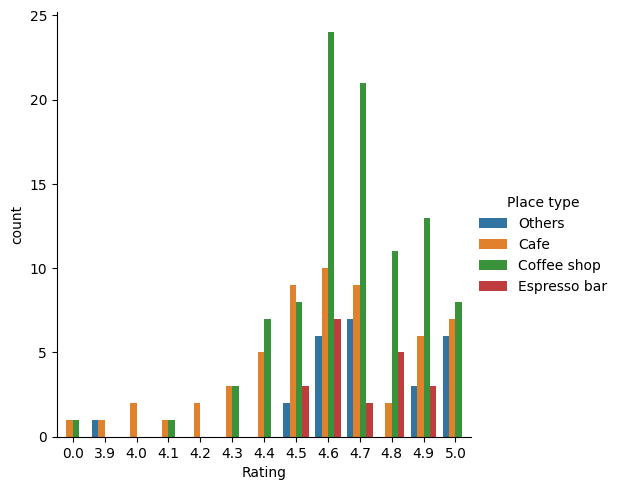

In [8]:
%matplotlib inline

#ratings
sns.catplot(data=coffee, x="Rating", kind="count", hue="Place type")

<ul>
    <li>
         <strong>We have 4.6 and 4.7 are the highest rating categories in our data, the rating frequency is shifted to high rating categories </strong>
    </li>
    <li>
        <strong> Coffee shops and Cafe are most rated stores
    </li>

</ul>

## Distribution of reviews


<Axes: xlabel='Reviews', ylabel='Count'>

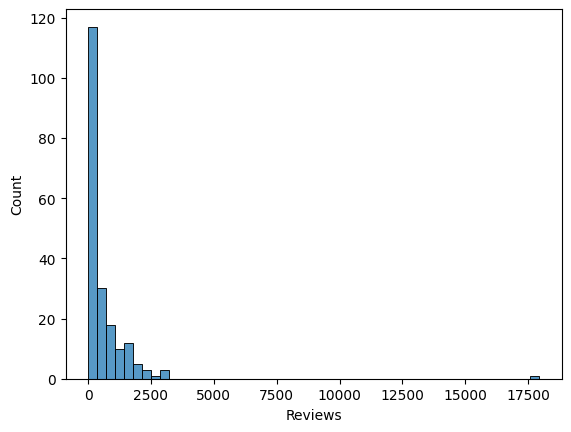

In [9]:
sns.histplot(data=coffee, x="Reviews", bins=50)

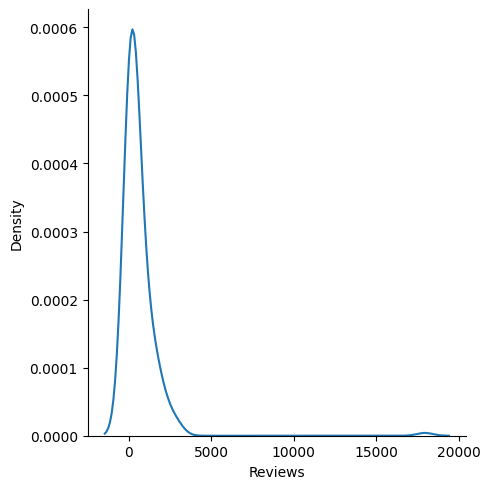

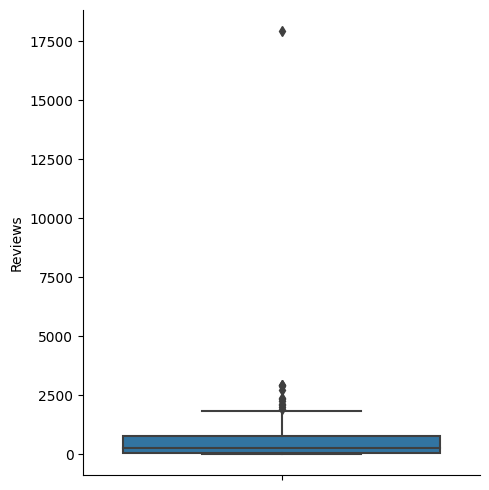

In [10]:

sns.displot(data=coffee, x="Reviews", kind="kde")
sns.catplot(data=coffee, y="Reviews", kind="box")


## Let's get ride of the outliers in reviews column

In [11]:
coffee["Reviews"].describe()

count      200.000000
mean       618.985000
std       1394.280842
min          3.000000
25%         48.500000
50%        271.500000
75%        780.750000
max      17937.000000
Name: Reviews, dtype: float64

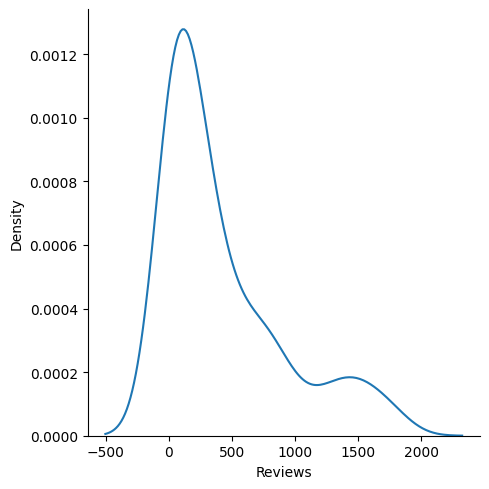

In [12]:
seventy_fifth = coffee["Reviews"].quantile(0.75)  
twenty_fifth = coffee["Reviews"].quantile(0.25)


iqr = seventy_fifth - twenty_fifth
lower = twenty_fifth - (1.5*iqr)
upper = seventy_fifth + (1.5*iqr)

coffee = coffee[(coffee["Reviews"] > lower) & (coffee["Reviews"] < upper) ]

sns.displot(data=coffee, x="Reviews", kind="kde")


In [13]:
coffee["Reviews"].describe()

count     188.000000
mean      422.101064
std       479.210260
min         3.000000
25%        40.000000
50%       224.500000
75%       643.000000
max      1820.000000
Name: Reviews, dtype: float64

<Axes: ylabel='Reviews'>

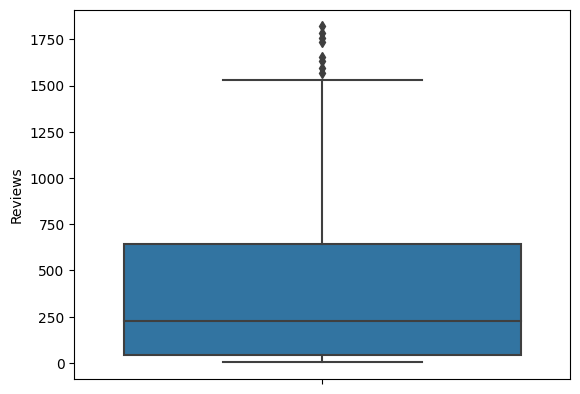

In [14]:
sns.boxplot(data=coffee, y="Reviews")

## Ratings and Reviews

<Axes: xlabel='Reviews', ylabel='Rating'>

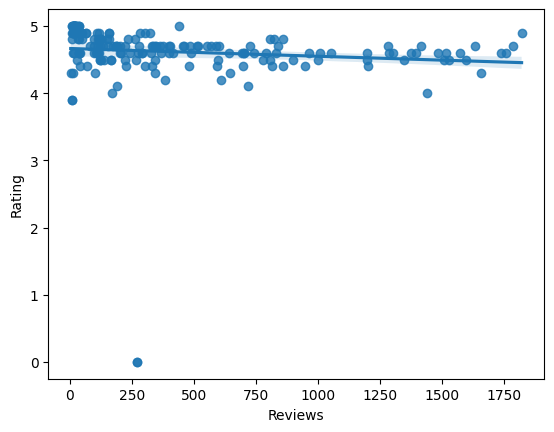

In [15]:
sns.regplot(data=coffee, x="Reviews", y="Rating")

<i><strong>The reviews are negatively correlated with Rating column</strong></i>

## Machine Learning

In [16]:
coffee.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [17]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           188 non-null    object 
 1   Place name       188 non-null    object 
 2   Place type       188 non-null    object 
 3   Rating           188 non-null    float64
 4   Reviews          188 non-null    float64
 5   Price            188 non-null    object 
 6   Delivery option  188 non-null    bool   
 7   Dine in option   188 non-null    bool   
 8   Takeout option   188 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 14.9+ KB


<Axes: xlabel='Reviews', ylabel='Rating'>

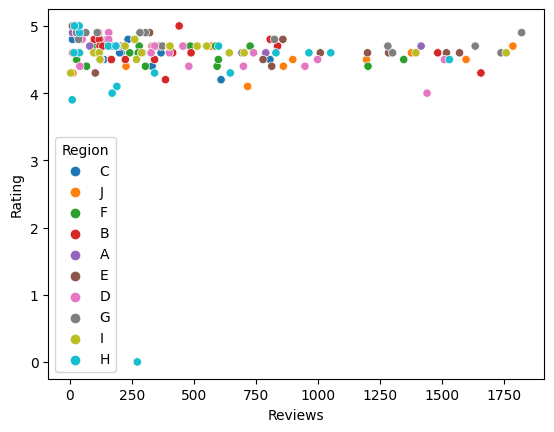

In [18]:
sns.scatterplot(data=coffee, x="Reviews", y="Rating", hue="Region")

<Axes: xlabel='Region', ylabel='Reviews'>

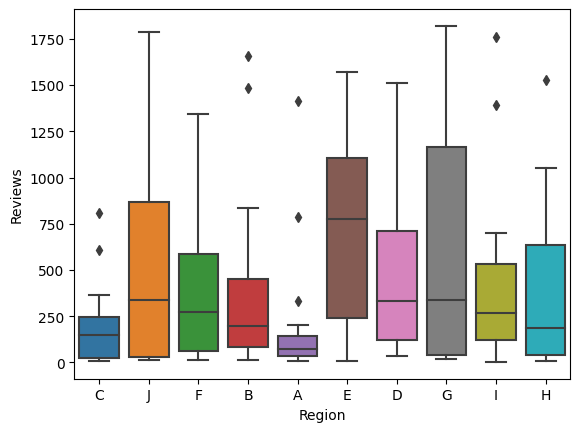

In [19]:
sns.boxplot(data=coffee, x="Region", y="Reviews")

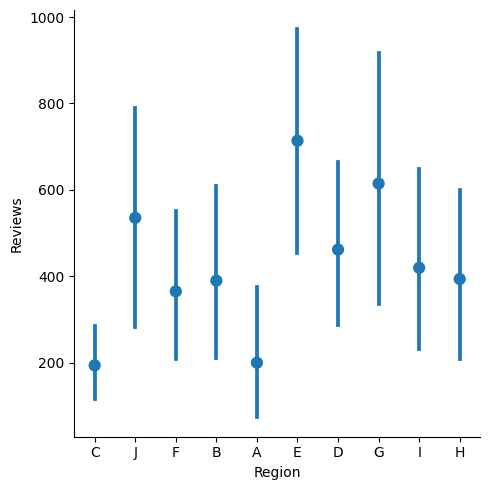

In [20]:
sns.catplot(data=coffee, x="Region", y="Reviews", kind="point", dodge=True, join=False)

In [21]:
coffee["Place type"].value_counts()

Place type
Coffee shop     88
Cafe            57
Others          24
Espresso bar    19
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

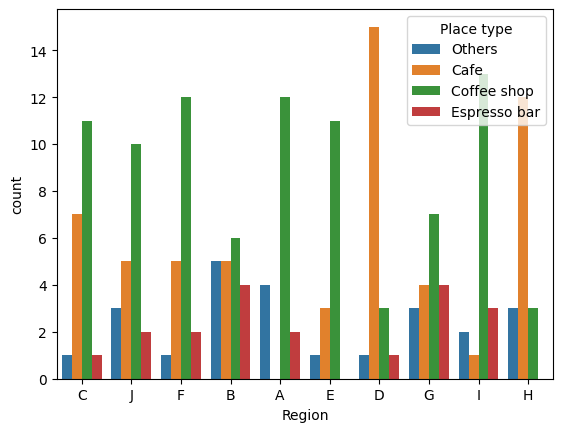

In [22]:
sns.countplot(data=coffee, x="Region", hue="Place type")

In [23]:
print(coffee.head())
coffee.dtypes

  Region             Place name   Place type  Rating  Reviews Price  \
0      C               Dim Kavu       Others     4.6    206.0    $$   
1      C                Коферум         Cafe     5.0     24.0    $$   
2      C       Кофейня Світ Чаю  Coffee shop     5.0     11.0    $$   
3      C       Кофейня Starcoff  Coffee shop     4.4    331.0    $$   
4      C  Кофейня "Friend Zone"  Coffee shop     5.0     12.0    $$   

   Delivery option  Dine in option  Takeout option  
0            False           False           False  
1            False           False            True  
2            False           False            True  
3            False            True            True  
4            False            True            True  


Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option        bool
Takeout option        bool
dtype: object

In [24]:
coffee.set_index("Region", inplace=True)
coffee

,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
Region,,,,,,,,
C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
C,Коферум,Cafe,5.0,24.0,$$,False,False,True
C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...
H,Artist,Others,4.6,963.0,$$$,False,True,True
H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True


In [25]:
coffee.groupby("Place type").agg({"Reviews":"mean", "Rating":"mean"})

,Reviews,Rating
Place type,,
Cafe,498.429825,4.519298
Coffee shop,376.812500,4.630682
Espresso bar,453.210526,4.694737
Others,382.250000,4.725000


In [26]:
#The name of the stores that have $$$ price
expensive_stores = coffee[coffee["Price"] == "$$$" ]["Place name"]
middle_expensive_stores = coffee[coffee["Price"] == "$$" ]["Place name"]
print(f"The name of the stores with high price range:\n {expensive_stores}  ")
print(f"The name of the stores with middle price range:\n {middle_expensive_stores.value_counts()}  ")

The name of the stores with high price range:
 Region
J         KOFEiN
D    ЕТУАЛЬ КАФЕ
H         Artist
Name: Place name, dtype: object  
The name of the stores with middle price range:
 Place name
Dim Kavy                                     4
Coffee House                                 3
coffee House                                 3
SV Кафе                                      2
MY COFFEE                                    2
                                            ..
Art Coffee - Інтернет Магазин Кави та Чаю    1
Coffeeshop GRANO                             1
Мастерская "Кофе на разлив"                  1
Coffeeсть                                    1
О...МАРАТ КАФЕ ПП ПОЛІСТЕП                   1
Name: count, Length: 172, dtype: int64  


In [27]:
coffee.set_index("Place name", inplace=True)
coffee

,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
Place name,,,,,,,
Dim Kavu,Others,4.6,206.0,$$,False,False,False
Коферум,Cafe,5.0,24.0,$$,False,False,True
Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...
Artist,Others,4.6,963.0,$$$,False,True,True
Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True


## Rename the catogories of the price column

In [28]:
new_catogories = {"$":"low_price",
                  "$$":"middle_price",
                  "$$$":"high_price"}
coffee["Price"] = coffee["Price"].astype("category")
coffee["Price"] = coffee["Price"].cat.rename_categories(new_categories=new_catogories)
coffee["Price"].value_counts()

Price
middle_price    183
high_price        3
low_price         2
Name: count, dtype: int64

## Correlation

In [29]:
corr = coffee[["Rating", "Reviews"]].corr()

<Axes: >

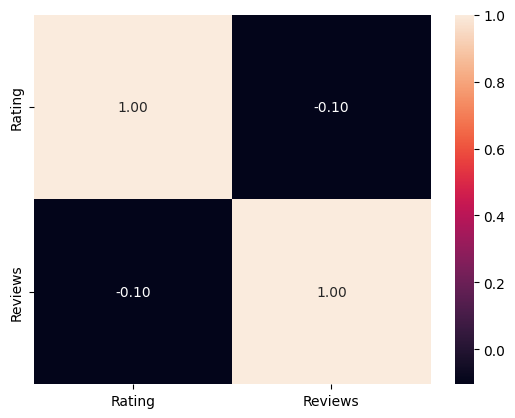

In [30]:
sns.heatmap(corr, annot=True, fmt='.2f')

### Whether Dine, delivery, and takeout options have a relaionship with reviews

In [31]:
# dine, and delivery, and takeaway options
coffee["Dine in option"].value_counts()

Dine in option
True     128
False     60
Name: count, dtype: int64

In [32]:
coffee["Delivery option"].value_counts()

Delivery option
False    157
True      31
Name: count, dtype: int64

In [33]:
coffee["Takeout option"].value_counts()

Takeout option
True     132
False     56
Name: count, dtype: int64

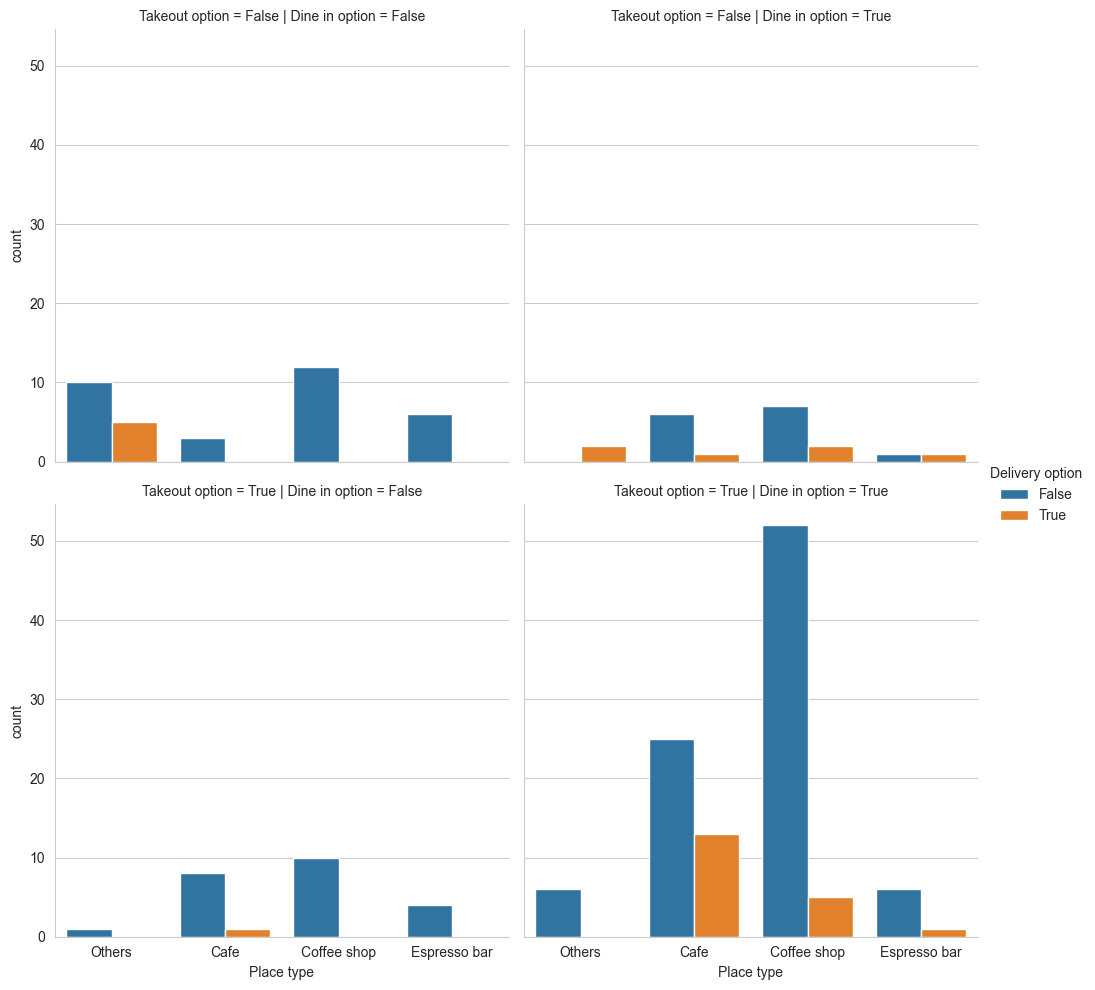

In [34]:
sns.set_style("whitegrid")

sns.catplot(data=coffee, x="Place type", hue="Delivery option", kind="count", col="Dine in option", row="Takeout option")


## The Coffee shops are the most places with dine, and delivery , takout options, Let's count the reviews

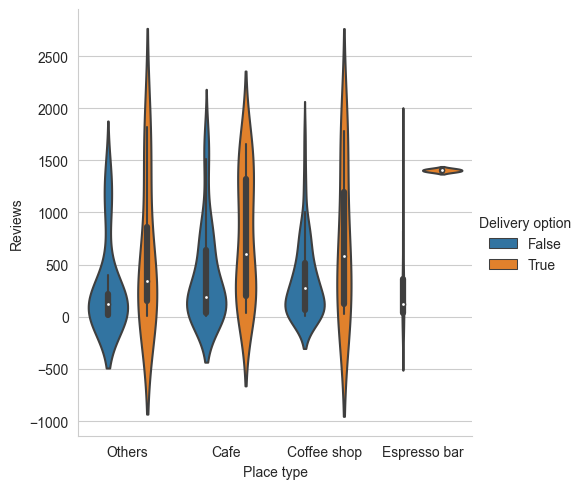

In [35]:
sns.catplot(data=coffee, y="Reviews", x="Place type", kind="violin", hue="Delivery option")

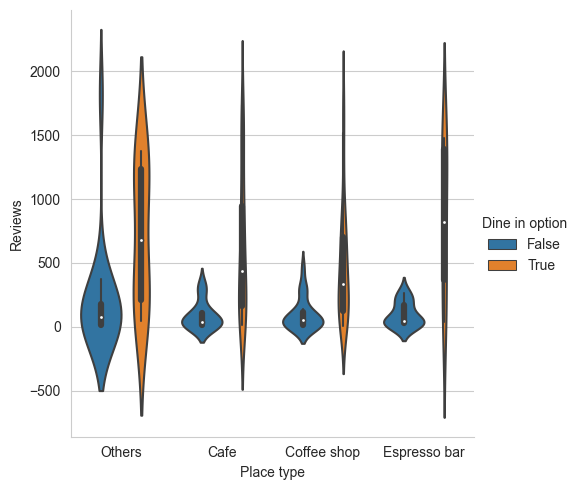

In [36]:
sns.catplot(data=coffee, x="Place type",y="Reviews", hue="Dine in option", kind="violin")

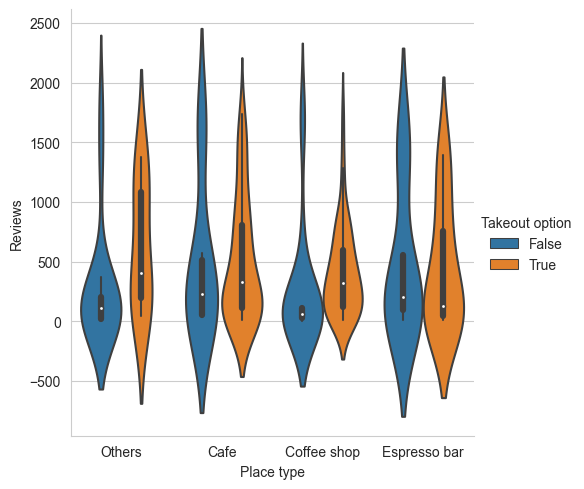

In [37]:
sns.catplot(data=coffee, x="Place type", y="Reviews", hue="Takeout option", kind="violin")

In [38]:
coffee[(coffee["Takeout option"] == False) & (coffee["Place type"] == "Cafe" )  ]["Reviews"].median()

230.75

In [39]:
#place type to categorical variable
coffee["Place type"] = coffee["Place type"].astype("category")
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Dim Kavu to О...МАРАТ КАФЕ ПП ПОЛІСТЕП
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Place type       188 non-null    category
 1   Rating           188 non-null    float64 
 2   Reviews          188 non-null    float64 
 3   Price            188 non-null    category
 4   Delivery option  188 non-null    bool    
 5   Dine in option   188 non-null    bool    
 6   Takeout option   188 non-null    bool    
dtypes: bool(3), category(2), float64(2)
memory usage: 9.7+ KB


# Machine learning model to predict the number of reviews a store will get

In [40]:
coffee["Delivery option"] = coffee["Delivery option"].astype("category")
coffee["Dine in option"] = coffee["Dine in option"].astype("category")
coffee["Takeout option"] = coffee["Takeout option"].astype("category")


In [41]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Dim Kavu to О...МАРАТ КАФЕ ПП ПОЛІСТЕП
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Place type       188 non-null    category
 1   Rating           188 non-null    float64 
 2   Reviews          188 non-null    float64 
 3   Price            188 non-null    category
 4   Delivery option  188 non-null    category
 5   Dine in option   188 non-null    category
 6   Takeout option   188 non-null    category
dtypes: category(5), float64(2)
memory usage: 10.0+ KB


In [42]:
new_categories = {
    True:"yes",
    False:"no"
}

coffee["Delivery option"] = coffee["Delivery option"].cat.rename_categories(new_categories=new_categories)
coffee["Dine in option"] = coffee["Dine in option"].cat.rename_categories(new_categories=new_categories)
coffee["Takeout option"] = coffee["Takeout option"].cat.rename_categories(new_categories=new_categories)
coffee.head()

,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
Place name,,,,,,,
Dim Kavu,Others,4.6,206.0,middle_price,no,no,no
Коферум,Cafe,5.0,24.0,middle_price,no,no,yes
Кофейня Світ Чаю,Coffee shop,5.0,11.0,middle_price,no,no,yes
Кофейня Starcoff,Coffee shop,4.4,331.0,middle_price,no,yes,yes
"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,middle_price,no,yes,yes


In [43]:
#one hot encoding
test = pd.get_dummies(coffee,columns=["Place type"], drop_first=False, dtype=int)
test

,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Place type_Cafe,Place type_Coffee shop,Place type_Espresso bar,Place type_Others
Place name,,,,,,,,,,
Dim Kavu,4.6,206.0,middle_price,no,no,no,0,0,0,1
Коферум,5.0,24.0,middle_price,no,no,yes,1,0,0,0
Кофейня Світ Чаю,5.0,11.0,middle_price,no,no,yes,0,1,0,0
Кофейня Starcoff,4.4,331.0,middle_price,no,yes,yes,0,1,0,0
"Кофейня ""Friend Zone""",5.0,12.0,middle_price,no,yes,yes,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
Artist,4.6,963.0,high_price,no,yes,yes,0,0,0,1
Dream Cafe,4.3,646.0,middle_price,no,yes,yes,1,0,0,0
РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,4.6,16.0,middle_price,no,yes,yes,1,0,0,0


In [44]:
data = pd.get_dummies(test, columns=["Delivery option", "Dine in option", "Takeout option", "Price"], dtype=int)
data.head()

,Rating,Reviews,Place type_Cafe,Place type_Coffee shop,Place type_Espresso bar,Place type_Others,Delivery option_no,Delivery option_yes,Dine in option_no,Dine in option_yes,Takeout option_no,Takeout option_yes,Price_low_price,Price_middle_price,Price_high_price
Place name,,,,,,,,,,,,,,,
Dim Kavu,4.6,206.0,0,0,0,1,1,0,1,0,1,0,0,1,0
Коферум,5.0,24.0,1,0,0,0,1,0,1,0,0,1,0,1,0
Кофейня Світ Чаю,5.0,11.0,0,1,0,0,1,0,1,0,0,1,0,1,0
Кофейня Starcoff,4.4,331.0,0,1,0,0,1,0,0,1,0,1,0,1,0
"Кофейня ""Friend Zone""",5.0,12.0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [45]:
X = data.drop("Reviews", axis=1).values
Y = data["Reviews"].values

X.shape, Y.shape


((188, 14), (188,))

In [57]:
np.std(X)

1.1945724074751487

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2122)

LR = LinearRegression()

LR.fit(X_train, y_train)


LinearRegression()

In [60]:
np.mean(X_train)

0.688876772082879

In [47]:
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

0.18574232215037056

In [58]:
MSE = mean_squared_error(y_test, y_pred)
MSE**(1/2)

416.26855285260575

## Ridge and Lasoo regression

In [61]:
from sklearn.linear_model import Ridge, Lasso

score_ridge=[]
score_lasso=[]

for alpha in [0.01,0.1,1,10,100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge.predict(X_test)
    score_ridge.append({f"alpha-{alpha}": ridge.score(X_test, y_test)})

for alpha in [0.01,0.1,1,10,100]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso.predict(X_test)
    score_lasso.append({f"alpha-{alpha}":lasso.score(X_test, y_test)})

print(f"ridge score: {score_ridge}\n lasso score: {score_lasso} ")




ridge score: [{'alpha-0.01': 0.18575700149452923}, {'alpha-0.1': 0.18590193953080847}, {'alpha-1': 0.18811782697948265}, {'alpha-10': 0.20527022833365682}, {'alpha-100': 0.1387620530404694}]
 lasso score: [{'alpha-0.01': 0.18573937524592277}, {'alpha-0.1': 0.18570570121463092}, {'alpha-1': 0.18514800001433607}, {'alpha-10': 0.18324551808531964}, {'alpha-100': 0.013405091867233487}] 


## Cross-validation

In [67]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2122)
reg = LinearRegression()
ridge_1 = Ridge(alpha=0.01)
cv_results = cross_val_score(ridge_1, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
cv_results*-1



array([141844.18687948, 190897.00853167, 404418.29044557, 252126.28257905,
       120664.63131719])